In [5]:
import os
HOME = os.getcwd()
print(HOME)

!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [6]:
# Create datasets directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Install and setup Roboflow
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="ONRrGJFVC9GgYdOf6Nr1")
project = rf.workspace("chicken-detection-e7acb").project("chicken-detection-gkoje")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 842.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully un

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chicken-Detection-3 in yolov8:: 100%|██████████| 1598/1598 [00:00<00:00, 7876.02it/s]


In [7]:
# Train YOLOv8 model
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 175MB/s]
New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chicken-Detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1717229072.87c18cea73e4.1787.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch600.jpg	weights
P_curve.png					    train_batch601.jpg
PR_curve.png					    train_batch602.jpg


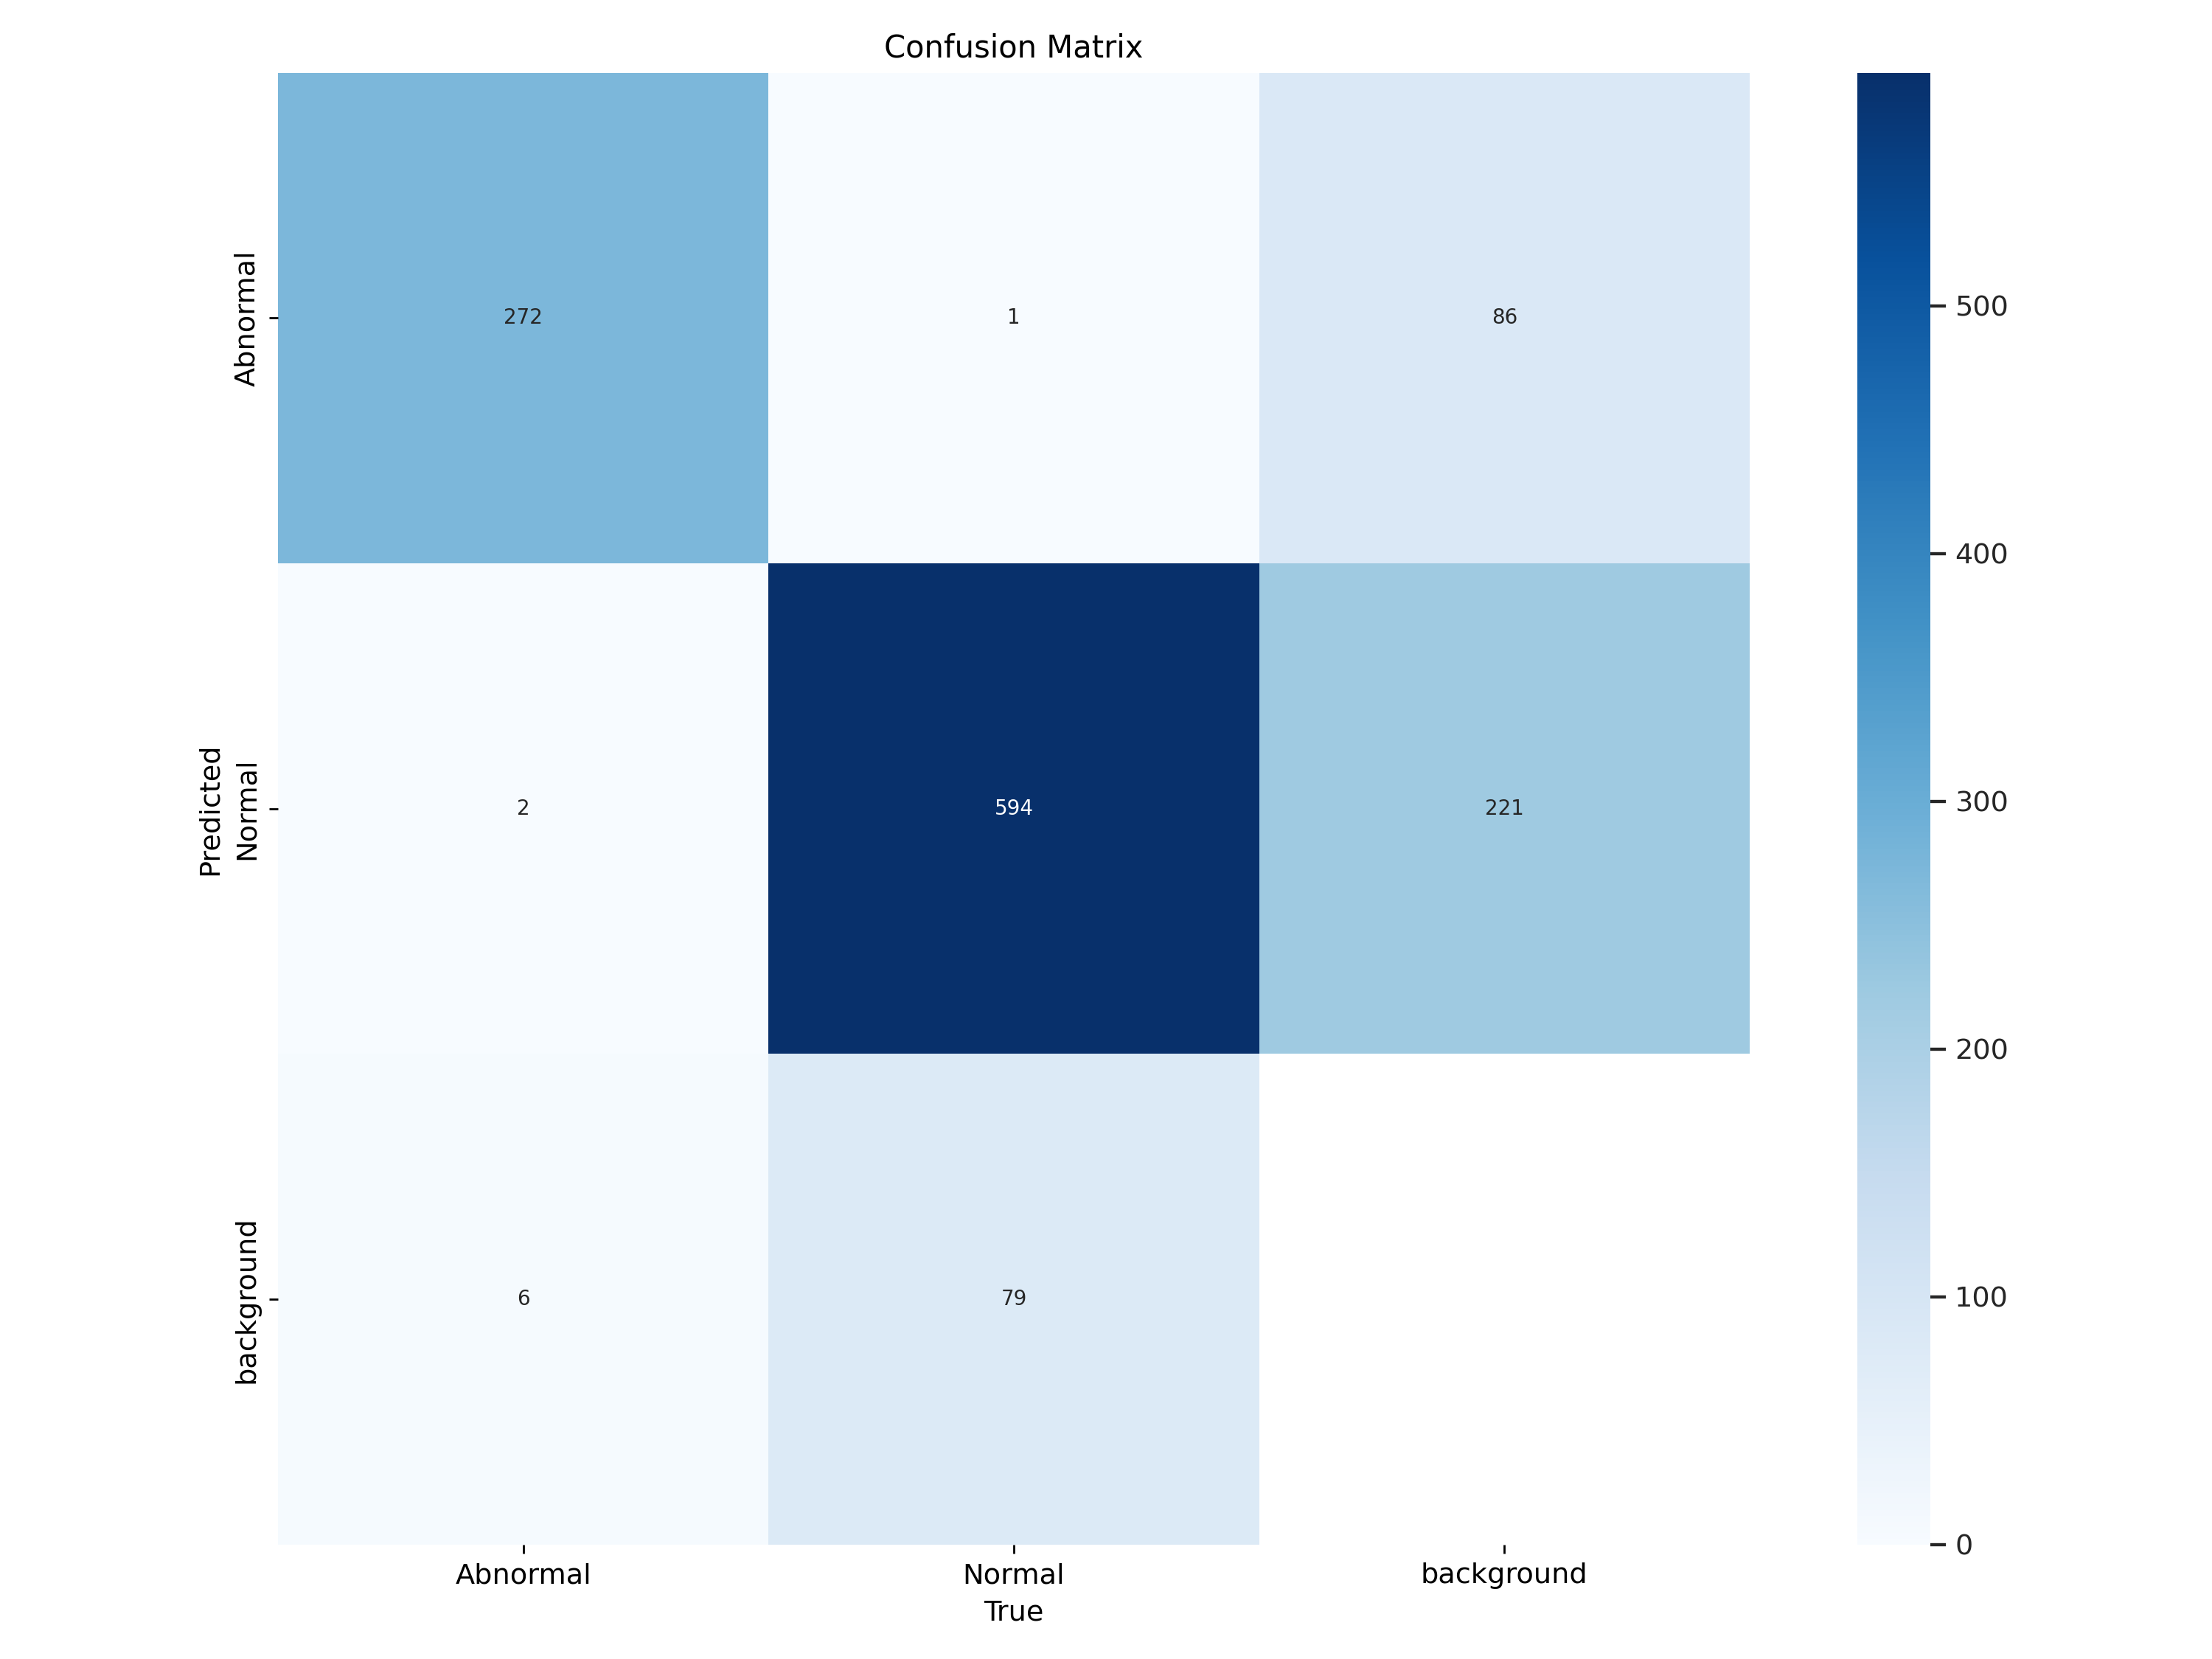

In [8]:
# Visualize training results
!ls {HOME}/runs/detect/train/

# Show confusion matrix
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


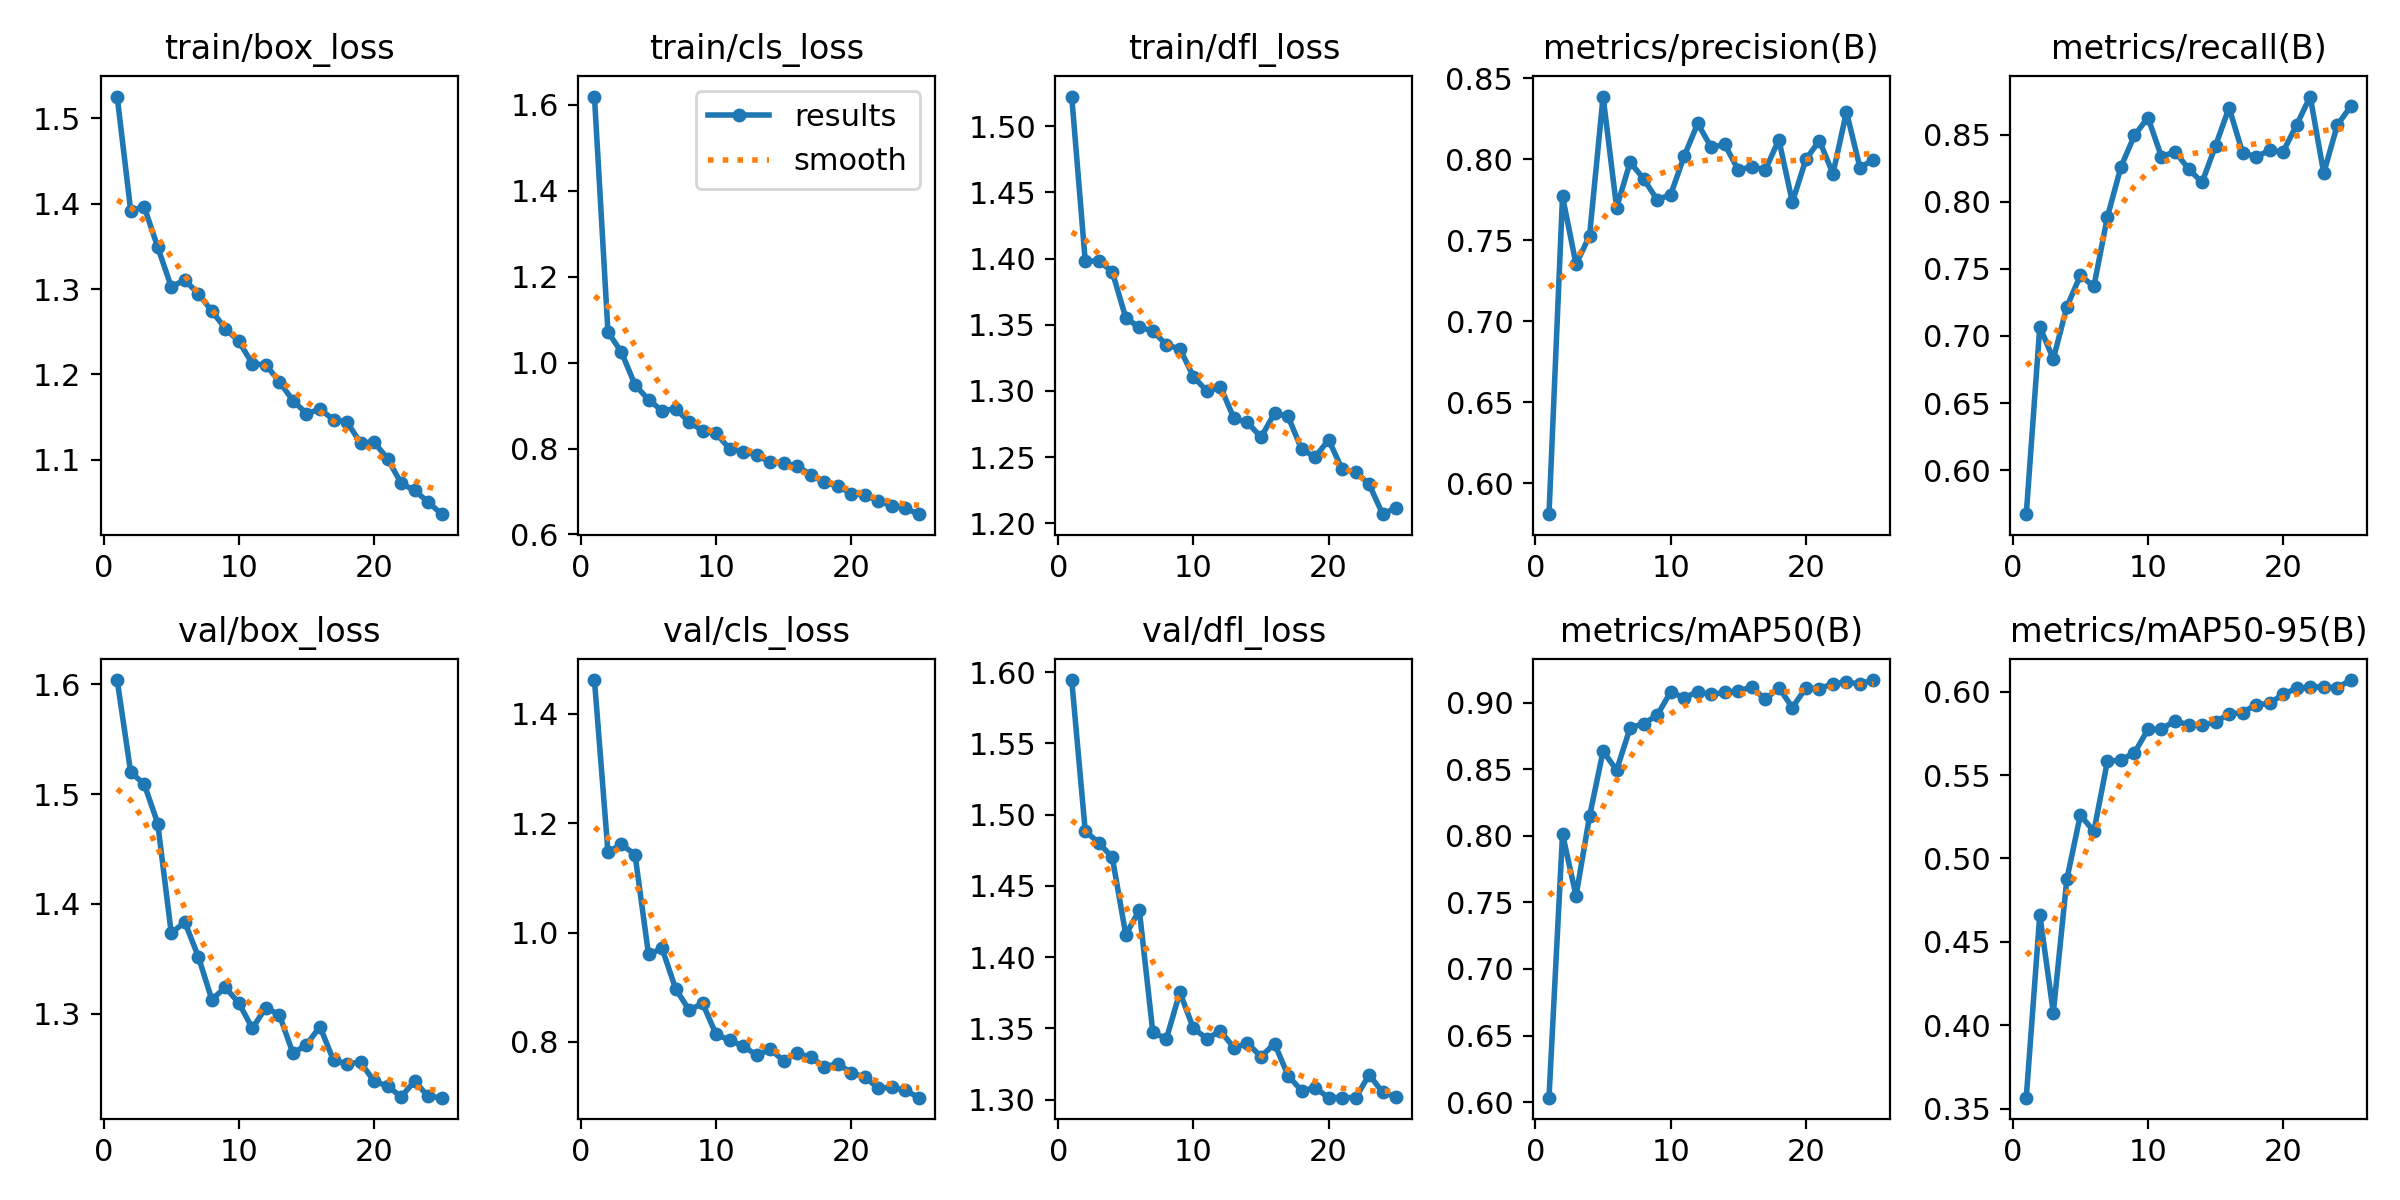

In [9]:
# Show results
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)


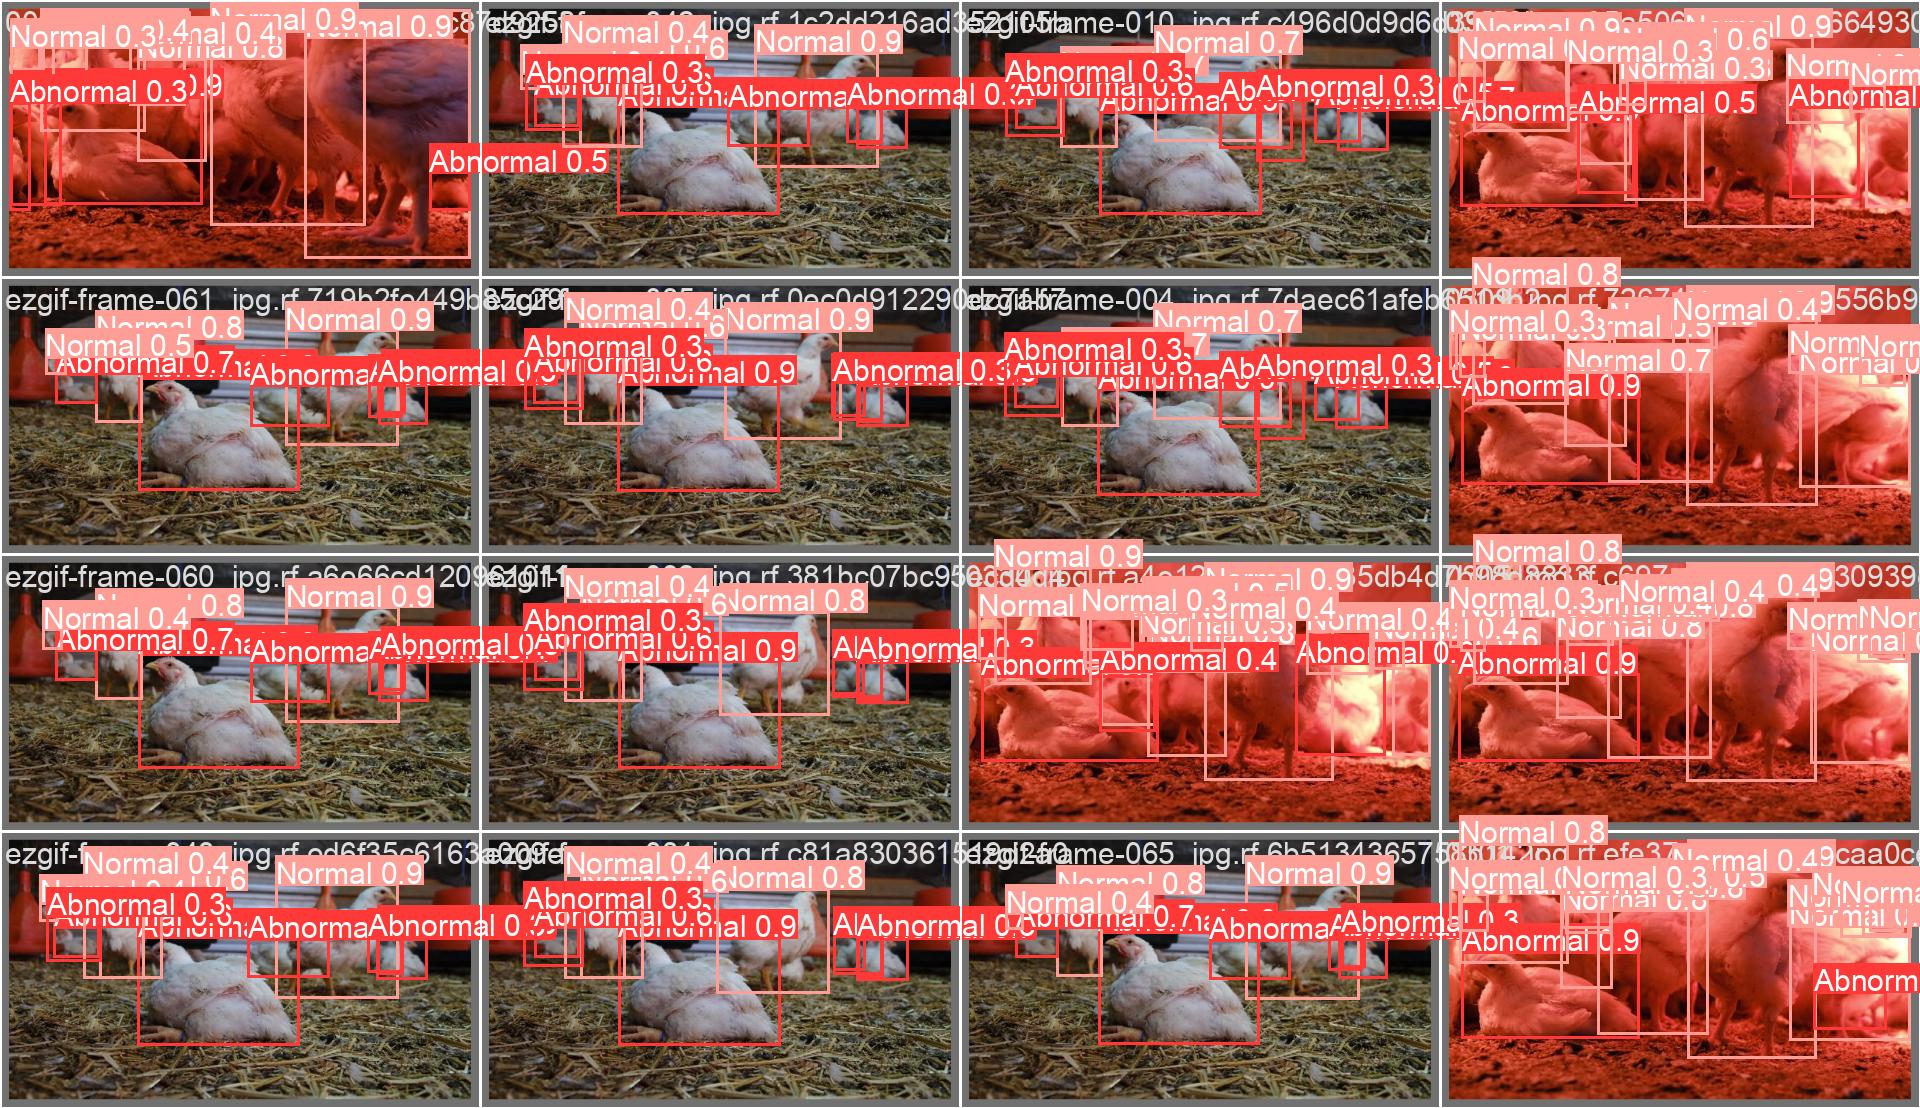

In [10]:
# Show validation batch predictions
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)



In [11]:
# Validate model
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Chicken-Detection-3/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:10<00:00,  1.43s/it]
                   all        104        954        0.8      0.872      0.917      0.608
              Abnormal        104        280      0.831      0.934      0.947      0.636
                Normal        104        674      0.768       0.81      0.887       0.58
Speed: 4.7ms preprocess, 13.6ms inference, 0.0ms loss, 13.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
# Predict using the trained model
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/53 /content/datasets/Chicken-Detection-3/test/images/0006_jpg.rf.c5d3954c4c1a3f7195acfba9cbce4549.jpg: 480x800 4 Abnormals, 10 Normals, 110.2ms
image 2/53 /content/datasets/Chicken-Detection-3/test/images/0012_jpg.rf.1f396e8b6d4630eda3ca263fa0fc2a2d.jpg: 480x800 5 Abnormals, 11 Normals, 15.6ms
image 3/53 /content/datasets/Chicken-Detection-3/test/images/0023_jpg.rf.012c4282946af70d9bd10be5589b3d7d.jpg: 480x800 4 Abnormals, 13 Normals, 15.6ms
image 4/53 /content/datasets/Chicken-Detection-3/test/images/0024_jpg.rf.8d6474d7a1eff0f10b686749c403dec0.jpg: 480x800 5 Abnormals, 12 Normals, 15.5ms
image 5/53 /content/datasets/Chicken-Detection-3/test/images/0027_jpg.rf.3c902bebfd455c12e83728281860c238.jpg: 480x800 4 Abnormals, 13 Normals, 15.5ms
image 6/53 /content/datasets/Chi

In [13]:
!pip install ipython
import cv2
import glob
from IPython.display import Image, display

# Define function to draw custom boxes
def draw_custom_boxes(image_path, model):
    img = cv2.imread(image_path)
    results = model(image_path)
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            if cls == 0:  # Assuming class 0 is normal chicken
                color = (0, 0, 255)  # Green
            else:  # Assuming other classes are abnormal chickens
                color = (0, 255, 0)  # Red
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.imwrite(image_path, img)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00



WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/runs/detect/predict/0142_jpg.rf.8192a6c82608cc02e5e3271ebffd4c0e.jpg: 480x800 3 Abnormals, 8 Normals, 139.2ms
Speed: 18.2ms preprocess, 139.2ms inference, 1171.6ms postprocess per image at shape (1, 3, 480, 800)


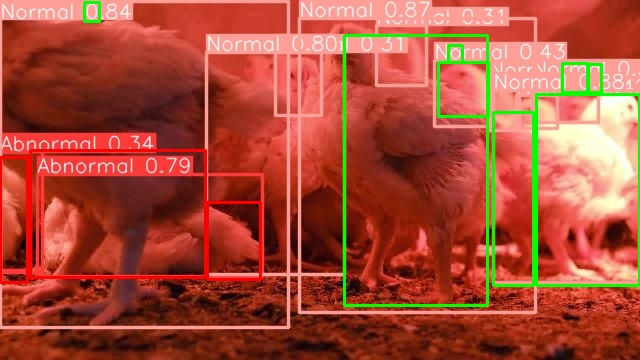

In [14]:
# Load trained YOLOv8 model
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# Draw custom boxes on predicted images
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:1]:
    draw_custom_boxes(image_path, model)
    display(Image(filename=image_path, width=600))


In [15]:
# Predict on video
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Untitled_Project_V1_V1.mp4


Streaming output truncated to the last 5000 lines.
video 1/1 (1456/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 9 Normals, 18.5ms
video 1/1 (1457/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 10 Normals, 18.5ms
video 1/1 (1458/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 10 Normals, 18.5ms
video 1/1 (1459/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 9 Normals, 18.5ms
video 1/1 (1460/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 10 Normals, 18.5ms
video 1/1 (1461/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 10 Normals, 18.6ms
video 1/1 (1462/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 11 Normals, 18.5ms
video 1/1 (1463/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 10 Normals, 18.5ms
video 1/1 (1464/6452) /content/Untitled_Project_V1_V1.mp4: 608x800 3 Abnormals, 8 Normals, 18.5ms
video 1/1 (1465/6452) /content/Untitled_Project_V1_V1.mp4: 60

In [16]:
# Define video processing function
def process_video(video_path, model, confidence_threshold=0.8):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output1.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        for result in results:
            for box in result.boxes:
                cls = int(box.cls[0])
                confidence = box.conf[0]
                if confidence >= confidence_threshold:
                    if cls == 1:  # Assuming class 0 is normal chicken
                        color = (0, 255, 0)  # Green
                        label = "normal"
                    else:  # Assuming other classes are abnormal chickens
                        color = (0, 0, 255)  # Red
                        label = "abnormal"
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, cv2.LINE_AA)
        out.write(frame)

    cap.release()
    out.release()


In [17]:
# Assuming 'model' is your pre-trained YOLOv8 model
process_video('/content/Untitled_Project_V1_V1.mp4', model, confidence_threshold=0.5)


Streaming output truncated to the last 5000 lines.
0: 608x800 2 Abnormals, 20.5ms
Speed: 4.9ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.2ms
Speed: 5.2ms preprocess, 18.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.1ms
Speed: 5.1ms preprocess, 18.1ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.2ms
Speed: 5.3ms preprocess, 18.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.2ms
Speed: 5.2ms preprocess, 18.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.2ms
Speed: 5.5ms preprocess, 18.2ms inference, 1.3ms postprocess per image at shape (

In [18]:
# Define non-max suppression function
def non_max_suppression(boxes, scores, threshold):
    if len(boxes) == 0:
        return []
    indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.5, nms_threshold=threshold)
    if isinstance(indices, np.ndarray):
        indices = indices.flatten()
    elif isinstance(indices, list) and len(indices) > 0 and isinstance(indices[0], list):
        indices = [i[0] for i in indices]
    return indices

# Define function to draw custom boxes
def draw_custom_boxes(image_path, model):
    img = cv2.imread(image_path)
    results = model(image_path)
    for result in results:
        boxes = []
        scores = []
        classes = []
        for box in result.boxes:
            cls = int(box.cls[0])
            score = box.conf[0]
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            boxes.append([x1, y1, x2, y2])
            scores.append(float(score))
            classes.append(cls)

        # Apply NMS
        indices = non_max_suppression(boxes, scores, threshold=0.4)

        for i in indices:
            x1, y1, x2, y2 = boxes[i]
            cls = classes[i]
            if cls == 0:  # Assuming class 0 is normal chicken
                color = (0, 255, 0)  # Green
                label = "normal"
            else:  # Assuming other classes are abnormal chickens
                color = (0, 0, 255)  # Red
                label = "abnormal"
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, cv2.LINE_AA)

    cv2.imwrite(image_path, img)


In [19]:
# Define video processing function
def process_video(video_path, model, confidence_threshold=0.5):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output19.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        for result in results:
            boxes = []
            scores = []
            classes = []
            for box in result.boxes:
                cls = int(box.cls[0])
                score = box.conf[0]
                if score >= confidence_threshold:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    boxes.append([x1, y1, x2, y2])
                    scores.append(float(score))
                    classes.append(cls)

            # Apply NMS
            indices = non_max_suppression(boxes, scores, threshold=0.4)

            for i in indices:
                x1, y1, x2, y2 = boxes[i]
                cls = classes[i]
                if cls == 0:  # Assuming class 0 is normal chicken
                    color = (0, 255, 0)  # Green
                    label = "normal"
                else:  # Assuming class 1 is abnormal chicken
                    color = (0, 0, 255)  # Red
                    label = "abnormal"
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, cv2.LINE_AA)
        out.write(frame)

    cap.release()
    out.release()


In [20]:
# Import numpy module
import numpy as np

# Define non-max suppression function
def non_max_suppression(boxes, scores, threshold):
    if len(boxes) == 0:
        return []
    indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.5, nms_threshold=threshold)
    if isinstance(indices, np.ndarray):
        indices = indices.flatten()
    elif isinstance(indices, list) and len(indices) > 0 and isinstance(indices[0], list):
        indices = [i[0] for i in indices]
    return indices

In [21]:
# Assuming 'model' is your pre-trained YOLOv8 model
process_video('/content/Untitled_Project_V1_V1.mp4', model, confidence_threshold=0.5)


Streaming output truncated to the last 5000 lines.
0: 608x800 2 Abnormals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 19.8ms
Speed: 6.5ms preprocess, 19.8ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 19.6ms
Speed: 5.4ms preprocess, 19.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (

In [22]:
!pip install tensorflow keras
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your pre-trained classifier model
classifier_model = load_model('/content/chicken_disease_classifier.h5')

def classify_disease(image):
    image = cv2.resize(image, (224, 224))  # Resize to match your classifier input size
    image = image / 255.0  # Normalize image
    image = image.reshape((1, 224, 224, 3))  # Reshape to match the model input
    prediction = classifier_model.predict(image)
    return prediction


In [25]:
# Integrate classification with detection
def draw_custom_boxes_with_classification(image_path, detection_model, classification_model):
    img = cv2.imread(image_path)
    results = detection_model(image_path)
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop_img = img[y1:y2, x1:x2]
            if cls == 1:  # Assuming class 1 is abnormal chicken
                prediction = classify_disease(crop_img)
                if prediction[0] > 0.5:
                    label = "Newcastle"
                    color = (255, 0, 0)  # Blue
                else:
                    label = "Leg Diseases"
                    color = (0, 0, 255)  # Red
            else:
                label = "normal"
                color = (0, 255, 0)  # Green

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, cv2.LINE_AA)
    cv2.imwrite(image_path, img)



image 1/1 /content/runs/detect/predict/0142_jpg.rf.8192a6c82608cc02e5e3271ebffd4c0e.jpg: 480x800 1 Abnormal, 2 Normals, 16.2ms
Speed: 2.3ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


1/1 [==============================] - 0s 21ms/step


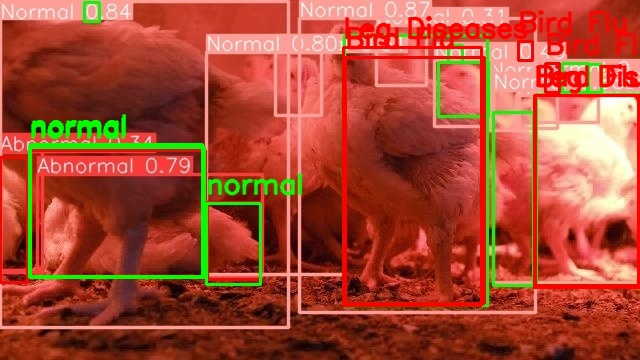

In [26]:
# Load YOLOv8 model
detection_model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# Process images
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:1]:
    draw_custom_boxes_with_classification(image_path, detection_model, classifier_model)
    display(Image(filename=image_path, width=600))


In [27]:
def process_video_with_classification(video_path, detection_model, classification_model, confidence_threshold=0.5):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output_with_classification.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = detection_model(frame)
        for result in results:
            boxes = []
            scores = []
            classes = []
            for box in result.boxes:
                cls = int(box.cls[0])
                score = box.conf[0]
                if score >= confidence_threshold:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    boxes.append([x1, y1, x2, y2])
                    scores.append(float(score))
                    classes.append(cls)

            # Apply NMS
            indices = non_max_suppression(boxes, scores, threshold=0.4)

            for i in indices:
                x1, y1, x2, y2 = boxes[i]
                cls = classes[i]
                crop_img = frame[y1:y2, x1:x2]
                if cls == 0:  # Assuming class 0 is normal chicken
                    color = (0, 255, 0)  # Green
                    label = "normal"
                else:  # Assuming class 1 is abnormal chicken
                    prediction = classify_disease(crop_img)
                    if prediction[0] > 0.5:
                        label = "Newcastle"
                        color = (255, 0, 0)  # Blue
                    else:
                        label = "Bird Flu"
                        color = (0, 0, 255)  # Red
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2, cv2.LINE_AA)
        out.write(frame)

    cap.release()
    out.release()


In [28]:
# Assuming 'detection_model' is your pre-trained YOLOv8 model
# and 'classifier_model' is your pre-trained classification model
process_video_with_classification('/content/Untitled_Project_V1_V1.mp4', detection_model, classifier_model, confidence_threshold=0.5)



0: 608x800 8 Abnormals, 2 Normals, 19.7ms
Speed: 6.6ms preprocess, 19.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.7ms
Speed: 6.8ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.7ms
Speed: 4.7ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 8 Abnormals, 2 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 3.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 3.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.5ms
Speed: 5.5ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 3.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 7.0ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 2 Normals, 19.5ms
Speed: 5.0ms preprocess, 19.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 9.2ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 3.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 3.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 3.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.5ms
Speed: 4.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 6.3ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.5ms
Speed: 5.4ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 19.9ms
Speed: 4.9ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 3.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 3.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.5ms
Speed: 4.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 8 Abnormals, 3 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 3.3ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 3.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.5ms
Speed: 4.2ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.5ms
Speed: 3.5ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 3.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 3.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.5ms
Speed: 5.2ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 3.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 5.4ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.5ms
Speed: 6.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 4 Normals, 19.1ms
Speed: 7.6ms preprocess, 19.1ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 4 Normals, 19.3ms
Speed: 5.0ms preprocess, 19.3ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 6.1ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 3.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.8ms
Speed: 4.4ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 3.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.5ms
Speed: 6.2ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.8ms
Speed: 5.3ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.7ms
Speed: 6.3ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 5 Normals, 18.6ms
Speed: 4.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.5ms
Speed: 3.9ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 6.1ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 3.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 5.7ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 3 Normals, 22.1ms
Speed: 4.9ms preprocess, 22.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 6 Abnormals, 3 Normals, 20.1ms
Speed: 4.8ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 9.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 6.8ms preprocess, 18.7ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.8ms
Speed: 6.4ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 6.7ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 70ms/step



0: 608x800 6 Abnormals, 4 Normals, 37.2ms
Speed: 10.5ms preprocess, 37.2ms inference, 11.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.9ms
Speed: 6.4ms preprocess, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 6.1ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 3.8ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 11.4ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 7.7ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 20.0ms
Speed: 5.7ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 3.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 19.0ms
Speed: 5.6ms preprocess, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 3.4ms preprocess, 18.6ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.9ms
Speed: 5.2ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 3 Normals, 19.7ms
Speed: 9.1ms preprocess, 19.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 6.4ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.9ms
Speed: 5.1ms preprocess, 18.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 6 Abnormals, 3 Normals, 19.1ms
Speed: 5.3ms preprocess, 19.1ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 7.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.4ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 5.2ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 20.5ms
Speed: 5.6ms preprocess, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 19.2ms
Speed: 4.8ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 7.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 19.9ms
Speed: 5.0ms preprocess, 19.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 3 Normals, 21.4ms
Speed: 5.3ms preprocess, 21.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 6 Abnormals, 3 Normals, 19.2ms
Speed: 4.9ms preprocess, 19.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.8ms
Speed: 5.8ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 8.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 6 Abnormals, 3 Normals, 28.4ms
Speed: 5.2ms preprocess, 28.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 4.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 8.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 3 Normals, 20.3ms
Speed: 5.3ms preprocess, 20.3ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 6.8ms preprocess, 18.7ms inference, 6.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 5 Abnormals, 4 Normals, 19.4ms
Speed: 6.6ms preprocess, 19.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 3.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 4.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 6.1ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.8ms
Speed: 5.3ms preprocess, 18.8ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 10.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 6.2ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.8ms
Speed: 4.8ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 8.4ms preprocess, 18.6ms inference, 4.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 4 Normals, 22.5ms
Speed: 6.5ms preprocess, 22.5ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Abnormals, 4 Normals, 21.9ms
Speed: 4.9ms preprocess, 21.9ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 6 Abnormals, 4 Normals, 19.0ms
Speed: 5.1ms preprocess, 19.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Abnormals, 4 Normals, 19.9ms
Speed: 4.9ms preprocess, 19.9ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 6 Abnormals, 4 Normals, 19.6ms
Speed: 7.6ms preprocess, 19.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.7ms
Speed: 6.2ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 7 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 9.3ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 3 Normals, 19.1ms
Speed: 4.9ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 7 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 7 Abnormals, 4 Normals, 18.6ms
Speed: 9.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 3.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 8.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.8ms
Speed: 5.0ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 5 Abnormals, 4 Normals, 19.5ms
Speed: 7.3ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.8ms
Speed: 7.7ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 6 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.7ms
Speed: 7.1ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.8ms
Speed: 7.1ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.7ms
Speed: 5.8ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.7ms
Speed: 5.8ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.7ms
Speed: 6.6ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 4 Normals, 21.8ms
Speed: 5.0ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 4 Normals, 21.3ms
Speed: 7.3ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 4 Normals, 21.1ms
Speed: 4.9ms preprocess, 21.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 2 Abnormals, 4 Normals, 21.5ms
Speed: 6.2ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 3 Normals, 19.1ms
Speed: 9.5ms preprocess, 19.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 9.8ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 19.9ms
Speed: 5.6ms preprocess, 19.9ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.8ms
Speed: 5.6ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 20.5ms
Speed: 5.7ms preprocess, 20.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 7.7ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 19.0ms
Speed: 4.9ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 20.0ms
Speed: 7.1ms preprocess, 20.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 19.9ms
Speed: 5.4ms preprocess, 19.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 2 Normals, 20.9ms
Speed: 7.0ms preprocess, 20.9ms inference, 6.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 23.1ms
Speed: 5.0ms preprocess, 23.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 23.9ms
Speed: 5.1ms preprocess, 23.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 4 Normals, 20.5ms
Speed: 5.0ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.8ms
Speed: 5.1ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 19.2ms
Speed: 5.4ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.8ms
Speed: 5.2ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.8ms
Speed: 5.3ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 19.8ms
Speed: 5.0ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.9ms
Speed: 6.0ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 10.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.3ms
Speed: 7.7ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 6.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 3 Normals, 19.8ms
Speed: 4.8ms preprocess, 19.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 4 Abnormals, 3 Normals, 21.3ms
Speed: 5.0ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 3 Normals, 26.4ms
Speed: 12.4ms preprocess, 26.4ms inference, 5.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 6.8ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 3 Normals, 19.0ms
Speed: 5.3ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.8ms
Speed: 6.4ms preprocess, 20.8ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 22.2ms
Speed: 6.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.8ms
Speed: 5.1ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 12.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.5ms
Speed: 3.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.8ms
Speed: 6.2ms preprocess, 18.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 4 Normals, 19.2ms
Speed: 5.0ms preprocess, 19.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 4 Normals, 20.1ms
Speed: 8.1ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 4 Normals, 20.2ms
Speed: 5.1ms preprocess, 20.2ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 4 Normals, 19.9ms
Speed: 8.4ms preprocess, 19.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 4 Normals, 18.5ms
Speed: 4.3ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 5 Normals, 18.5ms
Speed: 4.4ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnorm

1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 19.7ms
Speed: 4.9ms preprocess, 19.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 20.8ms
Speed: 4.6ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 4 Normals, 19.6ms
Speed: 4.8ms preprocess, 19.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.7ms
Speed: 6.5ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 5 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 7.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.8ms
Speed: 7.1ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.8ms
Speed: 5.0ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 20.6ms
Speed: 4.7ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 9.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.5ms
Speed: 5.2ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 2 Normals, 19.4ms
Speed: 4.4ms preprocess, 19.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 8.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.0ms
Speed: 4.9ms preprocess, 20.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 5.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 19.5ms
Speed: 4.7ms preprocess, 19.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 4 Normals, 21.6ms
Speed: 4.9ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 4 Normals, 19.9ms
Speed: 5.2ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 4 Normals, 18.5ms
Speed: 7.0ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 4 Normals, 18.5ms
Speed: 6.9ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 4 Normals, 18.5ms
Speed: 6.9ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 4 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 3 Normals, 23.1ms
Speed: 5.0ms preprocess, 23.1ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 5.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnorm

1/1 [==============================] - 0s 40ms/step



0: 608x800 4 Abnormals, 5 Normals, 19.0ms
Speed: 5.3ms preprocess, 19.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 52ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 6.5ms preprocess, 18.7ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 19.6ms
Speed: 7.2ms preprocess, 19.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 2 Normals, 22.1ms
Speed: 4.3ms preprocess, 22.1ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 4 Normals, 22.0ms
Speed: 4.9ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnorm

1/1 [==============================] - 0s 34ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.6ms
Speed: 4.9ms preprocess, 20.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.9ms
Speed: 5.2ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 3 Abnormals, 2 Normals, 22.3ms
Speed: 4.8ms preprocess, 22.3ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 1 Normal, 20.0ms
Speed: 5.6ms preprocess, 20.0ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.8ms
Speed: 4.8ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 19.1ms
Speed: 5.2ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 19.3ms
Speed: 6.1ms preprocess, 19.3ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 11.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 9.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.9ms
Speed: 5.8ms preprocess, 18.9ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Normals, 18.9ms
Speed: 5.5ms preprocess, 18.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.1ms
Speed: 5.3ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.9ms
Speed: 5.3ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 7.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 3 Abnormals, 4 Normals, 21.7ms
Speed: 6.5ms preprocess, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 4 Normals, 20.6ms
Speed: 7.4ms preprocess, 20.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 8.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 4 Normals, 21.3ms
Speed: 5.4ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 2 Normals, 21.3ms
Speed: 5.2ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 1 Normal, 21.1ms
Speed: 5.1ms preprocess, 21.1ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 4 Abnormals, 2 Normals, 19.3ms
Speed: 5.0ms preprocess, 19.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.5ms
Speed: 7.9ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 3 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 8.7ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 3 Normals, 20.5ms
Speed: 7.7ms preprocess, 20.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 3 Normals, 20.0ms
Speed: 6.8ms preprocess, 20.0ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 3 Normals, 21.0ms
Speed: 5.1ms preprocess, 21.0ms inference, 5.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 4 Abnormals, 2 Normals, 19.3ms
Speed: 5.6ms preprocess, 19.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 3 Normals, 20.8ms
Speed: 4.8ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 9.3ms preprocess, 18.6ms inference, 6.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 3 Abnormals, 3 Normals, 19.0ms
Speed: 5.2ms preprocess, 19.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 3 Abnormals, 3 Normals, 43.2ms
Speed: 12.7ms preprocess, 43.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Abnormals, 3 Normals, 23.7ms
Speed: 5.1ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 11.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 2 Normals, 20.2ms
Speed: 5.1ms preprocess, 20.2ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 3 Normals, 20.7ms
Speed: 4.8ms preprocess, 20.7ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 4 Abnormals, 3 Normals, 21.2ms
Speed: 5.4ms preprocess, 21.2ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 4 Abnormals, 2 Normals, 22.9ms
Speed: 5.7ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 4 Abnormals, 2 Normals, 24.8ms
Speed: 4.9ms preprocess, 24.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 3 Normals, 20.9ms
Speed: 5.1ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 3 Normals, 20.6ms
Speed: 5.1ms preprocess, 20.6ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 19.2ms
Speed: 4.6ms preprocess, 19.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 8.1ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.8ms
Speed: 5.6ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.4ms
Speed: 5.2ms preprocess, 19.4ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 19.0ms
Speed: 5.2ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 5.4ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 21.0ms
Speed: 6.8ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 1 Normal, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 6 Abnormals, 1 Normal, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 6 Abnormals,

1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.8ms
Speed: 7.8ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 20.9ms
Speed: 5.2ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.7ms
Speed: 8.2ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 6.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 9.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 

1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.3ms
Speed: 4.9ms preprocess, 19.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 9.0ms preprocess, 18.6ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.7ms
Speed: 5.2ms preprocess, 20.7ms inference, 4.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 2 Abnormals, 3 Normals, 20.8ms
Speed: 6.6ms preprocess, 20.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Abnormal, 3 Normals, 23.1ms
Speed: 5.3ms preprocess, 23.1ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.8ms
Speed: 6.1ms preprocess, 18.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 20.3ms
Speed: 5.0ms preprocess, 20.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 22.0ms
Speed: 5.0ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 6.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.5ms preproces

1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 9.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.5ms
Speed: 5.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.5ms
Speed: 4.4ms preprocess, 18.5ms inference, 1.8ms postpr

1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 8.3ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.9ms
Speed: 5.3ms preprocess, 18.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 26.4ms
Speed: 4.9ms preprocess, 26.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.0ms preprocess, 18.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 18.5ms
Spee

1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 6.2ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 6.3ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.5ms
Speed: 5.4ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 2 Abnormals, 2 Normals, 25.1ms
Speed: 5.2ms preprocess, 25.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 8.0ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 

1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.4ms
Speed: 9.1ms preprocess, 19.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 19.3ms
Speed: 7.4ms preprocess, 19.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 23.1ms
Speed: 4.9ms preprocess, 23.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 19.7ms
Speed: 4.7ms preprocess, 19.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 21.1ms
Speed: 6.9ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 19.7ms
Speed: 4.6ms preprocess, 19.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 N

1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 20.4ms
Speed: 5.3ms preprocess, 20.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 19.2ms
Speed: 6.3ms preprocess, 19.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 19.2ms
Speed: 8.5ms preprocess, 19.2ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 2 Normals, 20.6ms
Speed: 5.0ms preprocess, 20.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 2 Normals, 23.7ms
Speed: 9.5ms preprocess, 23.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 8.1ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.1ms
Speed: 4.6ms preprocess, 19.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 56ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.6ms
Speed: 6.6ms preprocess, 19.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Abnormal, 2 Normals, 19.3ms
Speed: 6.8ms preprocess, 19.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 7.6ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 7.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 7.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 9.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.1ms
Speed: 7.0ms preprocess, 19.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 19.2ms
Speed: 5.1ms preprocess, 19.2ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 6.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal

1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 6 Abnormals, 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 2 

1/1 [==============================] - 0s 36ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 2 Normals, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 6 Abnormals, 2 Normals, 18.6ms
Speed: 7.7ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals

1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 3 Normals, 21.4ms
Speed: 5.2ms preprocess, 21.4ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 4.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.6ms
Speed: 3.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 2 Normals, 18.9ms
Speed: 5.7ms preprocess, 18.9ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.3ms
Speed: 5.5ms preprocess, 20.3ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.7ms
Speed: 7.5ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.9ms
Speed: 5.2ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 19.4ms
Speed: 6.4ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.9ms
Speed: 5.2ms preprocess, 18.9ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.8ms
Speed: 7.3ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 20.6ms
Speed: 6.3ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 3 Normals, 19.6ms
Speed: 4.9ms preprocess, 19.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.4ms
Speed: 8.6ms preprocess, 20.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 3 Normals, 20.8ms
Speed: 4.9ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 5.8ms preprocess, 18.7ms inference, 4.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 3 Normals, 22.8ms
Speed: 5.1ms preprocess, 22.8ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 4 Normals, 20.6ms
Speed: 7.0ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 4 Normals, 20.3ms
Speed: 5.2ms preprocess, 20.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 4 Normals, 19.1ms
Speed: 5.6ms preprocess, 19.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 4 Normals, 19.1ms
Speed: 5.3ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 48ms/step



0: 608x800 3 Abnormals, 3 Normals, 20.1ms
Speed: 5.2ms preprocess, 20.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 2 Abnormals, 4 Normals, 20.5ms
Speed: 9.9ms preprocess, 20.5ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Abnormals, 5 Normals, 21.2ms
Speed: 5.9ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 20.5ms
Speed: 5.1ms preprocess, 20.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.8ms
Speed: 5.0ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 5 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 5 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.9ms
Speed: 5.0ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 4 Normals, 20.7ms
Speed: 7.2ms preprocess, 20.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 19.6ms
Speed: 4.6ms preprocess, 19.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 4 Abnormals, 3 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 4 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 4 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 3 Normals, 19.0ms
Speed: 5.4ms preprocess, 19.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 5.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 5 Abnormals, 3 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.8ms
Speed: 4.8ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 47ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.7ms
Speed: 8.0ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.0ms
Speed: 6.3ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 3 Abnormals, 3 Normals, 19.1ms
Speed: 5.3ms preprocess, 19.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 3 Normals, 21.1ms
Speed: 5.5ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 3 Abnormals, 3 Normals, 19.5ms
Speed: 5.1ms preprocess, 19.5ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 5.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Normals, 19.4ms
Speed: 6.2ms preprocess, 19.4ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 3 Normals, 22.9ms
Speed: 9.5ms preprocess, 22.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 1 Abnormal, 2 Normals, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 2 Normals, 18.9ms
Speed: 5.5ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.9ms
Speed: 6.9ms preprocess, 18.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Normals, 19.1ms
Speed: 6.0ms preprocess, 19.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Normals, 19.2ms
Speed: 9.0ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 11.9ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 (no detections), 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 11 Normals, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 10 Normals, 18.7ms
Speed: 7.1ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 11 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 11 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 9 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 10 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 10 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 9 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 9 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 9 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 10 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 5 Abnormals, 10 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 5 Abnormals, 9 Normals, 18.6ms
Speed: 8.5ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 5 Abnormals, 9 Normals, 18.6ms
Speed: 8.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 9.7ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 4 Abnormals, 13 Normals, 19.1ms
Speed: 5.7ms preprocess, 19.1ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 4 Abnormals, 13 Normals, 19.8ms
Speed: 10.0ms preprocess, 19.8ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 4 Abnormals, 13 Normals, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 6.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 4 Abnormals, 14 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 13 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 13 Normals, 22.3ms
Speed: 6.5ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 4 Abnormals, 10 Normals, 19.9ms
Speed: 7.8ms preprocess, 19.9ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 10 Normals, 19.3ms
Speed: 5.0ms preprocess, 19.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 4 Abnormals, 9 Normals, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 9 Normals, 18.8ms
Speed: 6.3ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 4 Abnormals, 10 Normals, 28.5ms
Speed: 11.6ms preprocess, 28.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 11 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.7ms
Speed: 4.7ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.7ms
Speed: 5.8ms preprocess, 18.7ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 5.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 8.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 4 Abnormals, 12 Normals, 20.3ms
Speed: 9.1ms preprocess, 20.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 4 Abnormals, 12 Normals, 20.2ms
Speed: 5.1ms preprocess, 20.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 13 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 13 Normals, 20.8ms
Speed: 4.9ms preprocess, 20.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.7ms
Speed: 6.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.9ms
Speed: 5.0ms preprocess, 18.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 11 Normals, 20.4ms
Speed: 5.2ms preprocess, 20.4ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 11 Normals, 20.5ms
Speed: 5.1ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 10.2ms preprocess, 18.6ms inference, 5.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 10 Normals, 21.2ms
Speed: 9.1ms preprocess, 21.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 10 Normals, 23.4ms
Speed: 5.1ms preprocess, 23.4ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 11 Normals, 21.3ms
Speed: 6.7ms preprocess, 21.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 20.4ms
Speed: 5.4ms preprocess, 20.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.8ms
Speed: 5.0ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 20.7ms
Speed: 5.1ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.9ms
Speed: 4.8ms preprocess, 18.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.9ms
Speed: 6.0ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 4.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 11 Normals, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 9.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 9 Normals, 19.0ms
Speed: 9.5ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 10 Normals, 20.8ms
Speed: 8.7ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 10 Normals, 19.6ms
Speed: 6.9ms preprocess, 19.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 22.0ms
Speed: 5.1ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 8 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 8 Normals, 20.9ms
Speed: 5.4ms preprocess, 20.9ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 7 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 8 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.9ms
Speed: 6.3ms preprocess, 18.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 8 Normals, 22.0ms
Speed: 7.5ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 8 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 8 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 8 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 7 Normals, 24.7ms
Speed: 5.8ms preprocess, 24.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 6 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 6 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 3 Abnormals, 6 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.8ms
Speed: 5.4ms preprocess, 18.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 3 Abnormals, 8 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 10 Normals, 21.6ms
Speed: 5.0ms preprocess, 21.6ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 8 Normals, 18.6ms
Speed: 9.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 6 Normals, 19.7ms
Speed: 6.5ms preprocess, 19.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 6 Normals, 18.6ms
Speed: 8.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Abnormals, 8 Normals, 19.2ms
Speed: 7.4ms preprocess, 19.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 8 Normals, 19.9ms
Speed: 6.6ms preprocess, 19.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 8 Normals, 20.4ms
Speed: 5.1ms preprocess, 20.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 12 Normals, 24.3ms
Speed: 4.7ms preprocess, 24.3ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 12 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.8ms
Speed: 6.3ms preprocess, 18.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 11 Normals, 20.8ms
Speed: 7.1ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 3 Abnormals, 11 Normals, 19.0ms
Speed: 5.3ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.7ms
Speed: 11.0ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 10 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.7ms
Speed: 6.2ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 10 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 10 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 6.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 1 Abnormal, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 11 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 11 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 14 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.9ms
Speed: 4.9ms preprocess, 18.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 2 Abnormals, 15 Normals, 20.6ms
Speed: 4.9ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 14 Normals, 22.1ms
Speed: 9.1ms preprocess, 22.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 2 Abnormals, 14 Normals, 22.8ms
Speed: 7.4ms preprocess, 22.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 50ms/step



0: 608x800 2 Abnormals, 13 Normals, 23.4ms
Speed: 8.7ms preprocess, 23.4ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 15 Normals, 22.6ms
Speed: 9.8ms preprocess, 22.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 16 Normals, 19.9ms
Speed: 5.0ms preprocess, 19.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 16 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 13 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 13 Normals, 19.7ms
Speed: 5.3ms preprocess, 19.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 13 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 13 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 13 Normals, 19.3ms
Speed: 6.3ms preprocess, 19.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 4.4ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 13 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 13 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 2 Abnormals, 13 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 12 Normals, 19.3ms
Speed: 4.9ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 2 Abnormals, 10 Normals, 19.0ms
Speed: 4.7ms preprocess, 19.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.8ms
Speed: 7.0ms preprocess, 18.8ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 9.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 2 Abnormals, 9 Normals, 22.8ms
Speed: 4.8ms preprocess, 22.8ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 8.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Abnormals, 9 Normals, 19.8ms
Speed: 4.9ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 9.3ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 10 Normals, 20.5ms
Speed: 5.0ms preprocess, 20.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.7ms
Speed: 4.7ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 20.5ms
Speed: 9.6ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 8.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 19.0ms
Speed: 5.1ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 12 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 13 Normals, 19.6ms
Speed: 5.0ms preprocess, 19.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 2 Abnormals, 11 Normals, 22.8ms
Speed: 6.5ms preprocess, 22.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 2 Abnormals, 12 Normals, 20.3ms
Speed: 5.3ms preprocess, 20.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 2 Abnormals, 11 Normals, 20.5ms
Speed: 10.0ms preprocess, 20.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Abnormals, 11 Normals, 20.7ms
Speed: 5.2ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 2 Abnormals, 11 Normals, 20.6ms
Speed: 4.9ms preprocess, 20.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 12 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Abnormals, 11 Normals, 20.5ms
Speed: 5.0ms preprocess, 20.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 2 Abnormals, 11 Normals, 19.7ms
Speed: 10.0ms preprocess, 19.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 56ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 9.0ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 51ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 12 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.8ms
Speed: 7.1ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.7ms
Speed: 6.7ms preprocess, 18.7ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 8 Normals, 22.4ms
Speed: 4.9ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 9.5ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 7 Normals, 22.5ms
Speed: 5.0ms preprocess, 22.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 8 Normals, 21.5ms
Speed: 7.3ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 8.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Abnormals, 8 Normals, 20.6ms
Speed: 8.0ms preprocess, 20.6ms inference, 5.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Abnormals, 9 Normals, 20.0ms
Speed: 4.9ms preprocess, 20.0ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.8ms
Speed: 7.3ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 8 Normals, 19.9ms
Speed: 4.9ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 2 Abnormals, 10 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 17ms/step



0: 608x800 2 Abnormals, 9 Normals, 22.0ms
Speed: 6.1ms preprocess, 22.0ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 12 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 13 Normals, 22.4ms
Speed: 6.1ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 14 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 15 Normals, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 1 Abnormal, 14 Normals, 19.2ms
Speed: 5.7ms preprocess, 19.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 1 Abnormal, 13 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 13 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 18ms/step



0: 608x800 1 Abnormal, 14 Normals, 32.6ms
Speed: 6.5ms preprocess, 32.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 13 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 11 Normals, 18.7ms
Speed: 10.0ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Abnormal, 12 Normals, 23.7ms
Speed: 7.7ms preprocess, 23.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 12 Normals, 20.3ms
Speed: 4.7ms preprocess, 20.3ms inference, 8.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 11 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 9 Normals, 19.0ms
Speed: 4.4ms preprocess, 19.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 10 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 10 Normals, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.7ms
Speed: 7.5ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 22ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 4.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 21ms/step



0: 608x800 1 Abnormal, 8 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 9 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 9 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 10 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 4 Abnormals, 11 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Abnormals, 12 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 5 Abnormals, 12 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 6.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 4 Abnormals, 12 Normals, 24.0ms
Speed: 4.7ms preprocess, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 12 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 14 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 4 Abnormals, 14 Normals, 22.5ms
Speed: 4.7ms preprocess, 22.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 23ms/step



0: 608x800 3 Abnormals, 13 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 19ms/step



0: 608x800 3 Abnormals, 14 Normals, 19.6ms
Speed: 8.5ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 20ms/step



0: 608x800 (no detections), 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 19.3ms
Speed: 4.8ms preprocess, 19.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 8.7ms preprocess, 18.6ms i

1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 19.1ms
Speed: 5.4ms preprocess, 19.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 7.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 20.0ms
Speed: 4.9ms preprocess, 20.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Normals, 18.9ms
Speed: 5.3ms preprocess, 18.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Normals, 19.4ms
Speed: 6.1ms preprocess, 19.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 8.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (

1/1 [==============================] - 0s 64ms/step



0: 608x800 2 Abnormals, 3 Normals, 22.2ms
Speed: 5.3ms preprocess, 22.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 5 Normals, 22.2ms
Speed: 5.1ms preprocess, 22.2ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Abnormal, 2 Normals, 22.4ms
Speed: 5.2ms preprocess, 22.4ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 4 Normals, 19.0ms
Speed: 5.2ms preprocess, 19.0ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 5 Normals, 23.2ms
Speed: 5.4ms preprocess, 23.2ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 21.3ms
Speed: 6.2ms preprocess, 21.3ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 27.0ms
Speed: 4.6ms preprocess, 27.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 22.3ms
Speed: 10.5ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals

1/1 [==============================] - 0s 38ms/step



0: 608x800 2 Abnormals, 6 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 5 Normals, 20.7ms
Speed: 6.8ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 3 Normals, 20.3ms
Speed: 4.9ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 6.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 6.4ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 4 Normals, 18.5ms
Speed: 6.4ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 5.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 

1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 6 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 5 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 5 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 4 Normals, 19.9ms
Speed: 4.6ms preprocess, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 4 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 5 Normals, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 4.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 3 Normals, 19.1ms
Speed: 4.8ms preprocess, 19.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.1ms
Speed: 5.1ms preprocess, 19.1ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 48ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.7ms
Speed: 6.1ms preprocess, 18.7ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 3 Abnormals, 4 Normals, 19.6ms
Speed: 6.5ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 3 Abnormals, 4 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 6.5ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 19.0ms
Speed: 5.1ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 3 Normals, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 4 

1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.9ms
Speed: 4.9ms preprocess, 18.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 20.3ms
Speed: 5.4ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.9ms
Speed: 5.0ms preprocess, 18.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 4 Normals, 19.0ms
Speed: 5.4ms preprocess, 19.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 6 Normals, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnorm

1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 7.2ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormal

1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 5.8ms preprocess, 18.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 19.6ms
Speed: 7.3ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 60ms/step



0: 608x800 2 Normals, 20.6ms
Speed: 5.0ms preprocess, 20.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 2 Normals, 20.0ms
Speed: 5.0ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 24.1ms
Speed: 8.6ms preprocess, 24.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 23.8ms
Speed: 6.8ms preprocess, 23.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.2ms
Speed: 4.8ms preprocess, 20.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 6.9ms preprocess, 18.5ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 N

1/1 [==============================] - 0s 26ms/step



0: 608x800 3 Abnormals, 3 Normals, 20.6ms
Speed: 7.0ms preprocess, 20.6ms inference, 5.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 20.6ms
Speed: 4.8ms preprocess, 20.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.5ms
Speed: 4.4ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 22.8ms
Speed: 4.6ms preprocess, 22.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 22.1ms
Speed: 4.7ms preprocess, 22.1ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 19.0ms
Speed: 7.6ms preprocess, 19.0ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 20.8ms
Speed: 5.7ms preprocess, 20.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18

1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Normal, 19.3ms
Speed: 5.1ms preprocess, 19.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.8ms
Speed: 5.1ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 3 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 22.9ms
Speed: 5.1ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 19.5ms
Speed: 6.5ms preprocess, 19.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 18.5ms
Speed: 7.0ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 6.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.1ms postprocess per image at s

1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Normal, 20.7ms
Speed: 5.2ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 26.7ms
Speed: 5.1ms preprocess, 26.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 20.6ms
Speed: 4.9ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 29.1ms
Speed: 7.2ms preprocess, 29.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 23.3ms
Speed: 6.5ms preprocess, 23.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 20.3ms
Speed: 5.0ms preprocess, 20.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 19.9ms
Speed: 5.1ms preprocess, 19.9ms

1/1 [==============================] - 0s 44ms/step



0: 608x800 1 Abnormal, 2 Normals, 20.5ms
Speed: 8.1ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 2 Normals, 21.0ms
Speed: 8.0ms preprocess, 21.0ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Normals, 23.3ms
Speed: 4.9ms preprocess, 23.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 19.9ms
Speed: 5.2ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.9ms
Speed: 4.8ms preprocess, 18.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 48ms/step



0: 608x800 1 Normal, 22.2ms
Speed: 7.2ms preprocess, 22.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.4ms
Speed: 4.7ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 19.8ms
Speed: 7.2ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.8ms
Speed: 5.0ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.9ms
Speed: 5.4ms preprocess, 18.9ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 25.1ms
Speed: 5.0ms preprocess, 25.1ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 10.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 12.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 4 Normals, 20.9ms
Speed: 5.2ms preprocess, 20.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 2 Abnormals, 4 Normals, 20.8ms
Speed: 6.7ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 10.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 23.2ms
Speed: 5.3ms preprocess, 23.2ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 (no detections), 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 22.8ms
Speed: 4.7ms preprocess, 22.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 11.6ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Spe

1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 7.4ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 21.6ms
Speed: 5.9ms preprocess, 21.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 5.5ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed

1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 21.8ms
Speed: 4.8ms preprocess, 21.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 21.8ms
Speed: 4.4ms preprocess, 21.8ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 

1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 2 Normals, 27.0ms
Speed: 4.9ms preprocess, 27.0ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 47ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 8.2ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.9ms
Speed: 8.9ms preprocess, 18.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 7.0ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.0ms
Speed: 7.7ms preprocess, 21.0ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.4ms
Speed: 5.0ms preprocess, 21.4ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 9.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.8ms
Speed: 4.6ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 1 Normal, 23.0ms
Speed: 5.1ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.7ms
Speed: 8.3ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 9.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 5.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 12.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 9.2ms preprocess, 18.6ms inference, 6.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.7ms
Speed: 7.2ms preprocess, 21.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 7.6ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.7ms
Speed: 5.9ms preprocess, 21.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 2 Abnormals, 3 Normals, 22.1ms
Speed: 5.2ms preprocess, 22.1ms inference, 6.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Abnormals, 3 Normals, 19.7ms
Speed: 4.9ms preprocess, 19.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 3 Normals, 20.7ms
Speed: 4.8ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Abnormals, 4 Normals, 21.0ms
Speed: 4.8ms preprocess, 21.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 20.0ms
Speed: 4.8ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 20.3ms
Speed: 4.6ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 10.1ms preprocess, 18.7ms inference, 6.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 49ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.9ms
Speed: 6.2ms preprocess, 18.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 1 Abnormal, 2 Normals, 20.4ms
Speed: 4.7ms preprocess, 20.4ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 11.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 3 Normals, 20.2ms
Speed: 4.9ms preprocess, 20.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 3 Normals, 21.0ms
Speed: 7.9ms preprocess, 21.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 21.1ms
Speed: 4.5ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 21.7ms
Speed: 4.9ms preprocess, 21.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 20.9ms
Speed: 4.9ms pr

1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 2 Normals, 19.9ms
Speed: 8.7ms preprocess, 19.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.5ms
Speed: 7.9ms preprocess, 21.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.9ms
Speed: 5.0ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.3ms
Speed: 6.8ms preprocess, 19.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 1 Normal, 19.6ms
Speed: 6.8ms preprocess, 19.6ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 9.0ms preprocess, 18.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Normals, 21.0ms
Speed: 6.8ms preprocess, 21.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.8ms
Speed: 8.5ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 3 Normals, 20.3ms
Speed: 6.3ms preprocess, 20.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 22.5ms
Speed: 4.8ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms 

1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 19.6ms
Speed: 9.7ms preprocess, 19.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 6.4ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 12.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image

1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 19.4ms
Speed: 6.8ms preprocess, 19.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 (no detections), 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 19.1ms
Speed: 10.8ms preprocess, 19.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 7.0ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 6 Normals, 20.8ms
Speed: 5.1ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 7.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 5 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 8.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 4 Normals, 20.3ms
Speed: 5.0ms preprocess, 20.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 9.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 5 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 5 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Normals, 19.0ms
Speed: 6.6ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 5 Normals, 18.7ms
Speed: 6.7ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 5 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 5 Normals, 18.7ms
Speed: 7.5ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 5 Normals, 22.6ms
Speed: 5.1ms preprocess, 22.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 5 Normals, 20.9ms
Speed: 5.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 5 Normals, 20.6ms
Speed: 5.2ms preprocess, 20.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 5 Normals, 22.4ms
Speed: 4.7ms preprocess, 22.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 6 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Normals, 20.0ms
Speed: 5.2ms preprocess, 20.0ms inference, 4.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 7 Normals, 21.2ms
Speed: 5.0ms preprocess, 21.2ms inference, 7.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 6 Normals, 22.7ms
Speed: 10.7ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 6 Normals, 20.1ms
Speed: 5.2ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 8 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 8 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Abnormals, 10 Normals, 20.8ms
Speed: 7.7ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 9 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 10 Normals, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 9 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 7 Normals, 18.6ms
Speed: 9.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 8 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 8 Normals, 18.6ms
Speed: 4.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 8 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 8 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 8 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 8 Normals, 20.1ms
Speed: 5.1ms preprocess, 20.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 8 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 9 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 8 Normals, 22.5ms
Speed: 5.4ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 1 Abnormal, 10 Normals, 18.6ms
Speed: 10.5ms preprocess, 18.6ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 8 Normals, 24.3ms
Speed: 6.4ms preprocess, 24.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 8 Normals, 21.9ms
Speed: 6.8ms preprocess, 21.9ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 8 Normals, 19.6ms
Speed: 4.9ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 54ms/step



0: 608x800 1 Abnormal, 9 Normals, 21.9ms
Speed: 4.8ms preprocess, 21.9ms inference, 4.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 7 Normals, 21.5ms
Speed: 5.9ms preprocess, 21.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 55ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 59ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 15.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 6 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 5 Normals, 20.7ms
Speed: 5.3ms preprocess, 20.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 6 Normals, 21.8ms
Speed: 4.9ms preprocess, 21.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Abnormals, 6 Normals, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 3 Abnormals, 7 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 8 Normals, 20.0ms
Speed: 4.9ms preprocess, 20.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Abnormal, 8 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.8ms
Speed: 4.8ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 7 Normals, 27.8ms
Speed: 5.1ms preprocess, 27.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 47ms/step



0: 608x800 1 Abnormal, 5 Normals, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 7 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 6 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 6 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 6 Normals, 22.4ms
Speed: 5.1ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 6 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 6 Normals, 23.1ms
Speed: 9.1ms preprocess, 23.1ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 7 Normals, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 55ms/step



0: 608x800 8 Normals, 18.9ms
Speed: 9.5ms preprocess, 18.9ms inference, 7.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Abnormals, 8 Normals, 18.8ms
Speed: 4.9ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 7 Normals, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 7 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 8 Normals, 21.3ms
Speed: 9.7ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 56ms/step



0: 608x800 1 Abnormal, 7 Normals, 21.3ms
Speed: 5.2ms preprocess, 21.3ms inference, 5.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 56ms/step



0: 608x800 1 Abnormal, 8 Normals, 18.6ms
Speed: 10.0ms preprocess, 18.6ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 7 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 18.5ms
Speed: 6.9ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 2.1ms postprocess 

1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Normals, 19.3ms
Speed: 6.1ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.7ms
Speed: 5.8ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms pos

1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 3 Normals, 19.3ms
Speed: 5.6ms preprocess, 19.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 2 Abnormals, 4 Normals, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 6.4ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 20.5ms
Speed: 5.3ms preprocess, 20.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 4.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inf

1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Normals, 19.3ms
Speed: 4.8ms preprocess, 19.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 53ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 7.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 18.7ms
Speed: 6.4ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 57ms/step



0: 608x800 1 Normal, 22.0ms
Speed: 4.8ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Normal, 23.6ms
Speed: 4.9ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 21.7ms
Speed: 4.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Normals, 22.6ms
Speed: 5.0ms preprocess, 22.6ms inference, 6.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 49ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 8.8ms preprocess, 18.6ms inference, 6.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 3 Normals, 19.5ms
Speed: 10.6ms preprocess, 19.5ms inference, 7.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Normals, 19.5ms
Speed: 7.1ms preprocess, 19.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 3 Normals, 19.8ms
Speed: 4.9ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 5.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 3 Normals, 19.0ms
Speed: 7.1ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 4 Normals, 26.8ms
Speed: 5.0ms preprocess, 26.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 4 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 57ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 2 Normals, 19.7ms
Speed: 12.1ms preprocess, 19.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 2 Normals, 18.7ms
Speed: 7.3ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 19.4ms
Speed: 6.4ms preprocess, 19.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Normals, 21.6ms
Speed: 5.2ms preprocess, 21.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 21.5ms
Speed: 5.1ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 8.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 19.2ms
Speed: 4.5ms preprocess, 19.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 24.7ms
Speed: 4.6ms preprocess, 24.7ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 1 Normal, 21.1ms
Speed: 5.0ms preprocess, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 23.0ms
Speed: 4.7ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Normal, 21.6ms
Speed: 4.8ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 49ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.7ms
Speed: 4.6ms preprocess, 21.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Abnormal, 1 Normal, 27.8ms
Speed: 5.0ms preprocess, 27.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 1 Abnormal, 1 Normal, 23.0ms
Speed: 4.9ms preprocess, 23.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 1 Abnormal, 1 Normal, 22.6ms
Speed: 4.9ms preprocess, 22.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 6.7ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.9ms
Speed: 5.2ms preprocess, 18.9ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.9ms
Speed: 5.0ms preprocess, 21.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 2 Normals, 20.0ms
Speed: 5.0ms preprocess, 20.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.9ms
Speed: 5.1ms preprocess, 18.9ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.2ms
Speed: 4.8ms preprocess, 19.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 19.4ms
Speed: 4.8ms preprocess, 19.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 1.0ms postprocess per image at s

1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 6.4ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms pos

1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 22.5ms
Speed: 5.4ms preprocess, 22.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 20.7ms
Speed: 5.2ms preprocess, 20.7ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 9.9ms preprocess, 18.6ms inference, 4.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 6.6ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnorm

1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 21.9ms
Speed: 5.2ms preprocess, 21.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 20.2ms
Speed: 5.4ms preprocess, 20.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 21.6ms
Speed: 5.0ms preprocess, 21.6ms inference, 2.1

1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 1 Normal, 19.4ms
Speed: 6.4ms preprocess, 19.4ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 48ms/step



0: 608x800 3 Abnormals, 1 Normal, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 2 Abnormals, 1 Normal, 20.6ms
Speed: 9.0ms preprocess, 20.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 68ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 8.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 4 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 23.2ms
Speed: 4.8ms preprocess, 23.2ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 22.2ms
Speed: 4.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 8.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18

1/1 [==============================] - 0s 40ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.5ms
Speed: 6.3ms preprocess, 19.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 2 Normals, 22.6ms
Speed: 5.1ms preprocess, 22.6ms inference, 7.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Normal, 21.3ms
Speed: 7.2ms preprocess, 21.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 2 Abnormals, 2 Normals, 22.9ms
Speed: 4.9ms preprocess, 22.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.1ms
Speed: 9.1ms preprocess, 19.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 7.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.8ms
Speed: 7.0ms preprocess, 18.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Abnormal, 5 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 56ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 5 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Normals, 18.8ms
Speed: 6.5ms preprocess, 18.8ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Normals, 18.9ms
Speed: 5.2ms preprocess, 18.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 24ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 3 Normals, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 4.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 4.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 3 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 6.6ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 6.5ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 4.7ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.8ms
Speed: 6.3ms preprocess, 18.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 4.8ms p

1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 47ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 23.7ms
Speed: 4.5ms preprocess, 23.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 4.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 4.9ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 6.9ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 19.3ms
Speed: 8.3ms preprocess, 19.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Normal, 22.3ms
Speed: 4.5ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 54ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Normal, 20.7ms
Speed: 4.8ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 22.5ms
Speed: 4.6ms preprocess, 22.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.4ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 22.3ms
Speed: 4.8ms preprocess, 22.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 9.0ms preprocess, 18.6ms inference, 7.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 49ms/step



0: 608x800 1 Normal, 23.3ms
Speed: 9.6ms preprocess, 23.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 56ms/step



0: 608x800 2 Normals, 19.2ms
Speed: 6.7ms preprocess, 19.2ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 59ms/step



0: 608x800 3 Normals, 20.6ms
Speed: 7.3ms preprocess, 20.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 20.0ms
Speed: 5.2ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 61ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 61ms/step



0: 608x800 1 Normal, 21.6ms
Speed: 6.5ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.1ms preprocess, 18.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 9.9ms preprocess, 18.6ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 1 Normal, 20.0ms
Speed: 10.7ms preprocess, 20.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 21.9ms
Speed: 8.1ms preprocess, 21.9ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 21.0ms
Speed: 4.4ms preprocess, 21.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Normal, 25.5ms
Speed: 8.3ms preprocess, 25.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 20.3ms
Speed: 6.1ms preprocess, 20.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 24.9ms
Speed: 5.2ms preprocess, 24.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 21.9ms
Speed: 5.2ms preprocess, 21.9ms inference, 3.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 2 Normals, 18.8ms
Speed: 5.6ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 19.5ms
Speed: 6.7ms preprocess, 19.5ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 5.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 48ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 6.6ms preprocess, 18.7ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 5.9ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.8ms
Speed: 5.2ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.5ms
Speed: 8.4ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.8ms
Speed: 5.0ms preprocess, 18.8ms inference, 6.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.9ms
Speed: 5.1ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.7ms
Speed: 5.3ms preprocess, 18.7ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.7ms
Speed: 6.7ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 43ms/step



0: 608x800 1 Abnormal, 4 Normals, 18.7ms
Speed: 6.0ms preprocess, 18.7ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Normals, 18.8ms
Speed: 5.5ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 19.4ms
Speed: 9.4ms preprocess, 19.4ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 7.9ms preprocess, 18.6ms inference, 2.2ms postp

1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 19.6ms
Speed: 5.9ms preprocess, 19.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.4ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 No

1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.7ms
Speed: 7.7ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 6.2ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 5.1ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 19.8ms
Speed: 4.8ms preprocess, 19.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 4 Abnormals, 1 Normal, 18.7ms
Speed: 6.1ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1

1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.9ms
Speed: 5.0ms preprocess, 18.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.5ms
Speed: 5.0ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals,

1/1 [==============================] - 0s 31ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.7ms
Speed: 6.6ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 6.2ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 2 Abnormals, 2 Normals, 21.2ms
Speed: 5.9ms preprocess, 21.2ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 2 Normals, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.7ms
Speed: 4.6ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Abnormals, 2 Normals, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 53ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.8ms
Speed: 5.5ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 1 Normal, 19.5ms
Speed: 5.8ms preprocess, 19.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 3 Abnormals

1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 22.2ms
Speed: 6.8ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 21.3ms
Speed: 4.2ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 45ms/step



0: 608x800 1 Abnormal, 2 Normals, 23.5ms
Speed: 8.8ms preprocess, 23.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 48ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.9ms
Speed: 5.1ms preprocess, 19.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 19.4ms
Speed: 6.4ms preprocess, 19.4ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 22.5ms
Speed: 5.2ms preprocess, 22.5ms inference, 6.3ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 19.5ms
Speed: 4.8ms preprocess, 19.5ms inference, 3.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 22.5ms
Speed: 6.8ms preprocess, 22.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 20.9ms
Speed: 4.6ms preprocess, 20.9ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Normal, 23.5ms
Speed: 6.6ms preprocess, 23.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.7ms pr

1/1 [==============================] - 0s 45ms/step



0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 5.3ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Spee

1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.9ms
Speed: 4.4ms preprocess, 18.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 6.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.8ms
Speed: 4.7ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 2 Abnormals, 2 Normals, 22.0ms
Speed: 4.9ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 6.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 2 Normals, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 19.0ms
Speed: 6.6ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 7.0ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.5ms
Speed: 6.6ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 2 Normals, 18.6ms
Speed: 9.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 

1/1 [==============================] - 0s 28ms/step



0: 608x800 2 Abnormals, 1 Normal, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 1 Normal, 20.3ms
Speed: 5.3ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 1 Normal, 18.9ms
Speed: 4.9ms preprocess, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 Abnormals, 18.6ms
Speed: 5.2ms preprocess, 18.6

1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 3 Normals, 20.7ms
Speed: 8.8ms preprocess, 20.7ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 9.1ms preprocess, 18.6ms inference, 6.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Abnormal, 3 Normals, 20.9ms
Speed: 5.2ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 3 Normals, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Abnormal, 3 Normals, 21.3ms
Speed: 5.0ms preprocess, 21.3ms inference, 3.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Abnormal, 3 Normals, 22.3ms
Speed: 5.0ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 7.2ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.7ms
Speed: 6.7ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Abnormal, 3 Normals, 26.1ms
Speed: 7.9ms preprocess, 26.1ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.8ms
Speed: 5.7ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 54ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.8ms
Speed: 6.9ms preprocess, 18.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 3 Normals, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Normals, 22.2ms
Speed: 5.0ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 3 Normals, 23.5ms
Speed: 11.7ms preprocess, 23.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 3 Normals, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 3 Normals, 18.7ms
Speed: 4.8ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.8ms
Speed: 4.6ms preprocess, 18.8ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.6ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.4ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.8ms preprocess, 18.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Abnormal, 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 2.0ms postprocess per image at

1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 9.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 46ms/step



0: 608x800 1 Normal, 20.9ms
Speed: 9.9ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 1 Normal, 21.9ms
Speed: 4.9ms preprocess, 21.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Normal, 23.2ms
Speed: 4.6ms preprocess, 23.2ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Normal, 23.2ms
Speed: 4.9ms preprocess, 23.2ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.8ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 20.3ms
Speed: 4.9ms preprocess, 20.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 59ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.2ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 20.9ms
Speed: 5.2ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 21.3ms
Speed: 4.6ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 12.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 (no detections), 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.7ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.5ms preprocess, 18.5ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.9ms preprocess, 18.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.3ms preprocess, 18.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 4.9ms preprocess, 18.5ms i

1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 15.9ms
Speed: 6.6ms preprocess, 15.9ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 37ms/step



0: 608x800 1 Normal, 17.3ms
Speed: 4.5ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.4ms
Speed: 4.8ms preprocess, 18.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 15.9ms
Speed: 7.0ms preprocess, 15.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 16.0ms
Speed: 4.6ms preprocess, 16.0ms inference, 3.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.8ms
Speed: 5.2ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 21.6ms
Speed: 6.2ms preprocess, 21.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 7.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 6.1ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 19.7ms
Speed: 4.8ms preprocess, 19.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 6.4ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 20.5ms
Speed: 4.6ms preprocess, 20.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.0ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Normal, 19.4ms
Speed: 8.2ms preprocess, 19.4ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 9.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 47ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 38ms/step



0: 608x800 1 Normal, 21.2ms
Speed: 8.2ms preprocess, 21.2ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 41ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 19.6ms
Speed: 4.7ms preprocess, 19.6ms inference, 4.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 59ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.7ms
Speed: 5.7ms preprocess, 20.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.4ms
Speed: 5.3ms preprocess, 20.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.9ms
Speed: 4.8ms preprocess, 19.9ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.8ms
Speed: 5.1ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.0ms
Speed: 5.9ms preprocess, 19.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 33ms/step



0: 608x800 1 Abnormal, 1 Normal, 21.5ms
Speed: 8.0ms preprocess, 21.5ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 36ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.8ms
Speed: 4.9ms preprocess, 19.8ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.1ms
Speed: 7.3ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 40ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.0ms
Speed: 5.2ms preprocess, 20.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 53ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Abnormal, 1 Normal, 20.0ms
Speed: 6.5ms preprocess, 20.0ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 4.8ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 42ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.7ms
Speed: 7.2ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Abnormal, 1 Normal, 23.2ms
Speed: 4.8ms preprocess, 23.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 35ms/step



0: 608x800 1 Abnormal, 1 Normal, 23.6ms
Speed: 7.2ms preprocess, 23.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 55ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.2ms
Speed: 4.9ms preprocess, 19.2ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 39ms/step



0: 608x800 1 Abnormal, 1 Normal, 22.3ms
Speed: 4.9ms preprocess, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 44ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 7.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.4ms preprocess, 18.6ms inference, 4.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Abnormal, 1 Normal, 22.7ms
Speed: 5.0ms preprocess, 22.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.6ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.3ms
Speed: 4.8ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Abnormal, 1 Normal, 19.3ms
Speed: 5.1ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Abnormal, 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 1 Normal, 23.6ms
Speed: 5.0ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.4ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.3ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.0ms preprocess, 18.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 7.5ms preprocess, 18.6ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.2ms preprocess, 18.6ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 30ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.6ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 25ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.1ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 31ms/step



0: 608x800 1 Normal, 18.7ms
Speed: 5.7ms preprocess, 18.7ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 20.4ms
Speed: 6.7ms preprocess, 20.4ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 28ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 26ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.8ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 27ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 5.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 8.6ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.9ms preprocess, 18.6ms inference, 3.2ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 32ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 29ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Normal, 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)


1/1 [==============================] - 0s 34ms/step



0: 608x800 1 Abnormal, 18.6ms
Speed: 5.3ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 7.4ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.5ms
Speed: 5.9ms preprocess, 18.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 8.3ms preprocess, 18.6ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 5.8ms preprocess, 18.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 6.1ms preprocess, 18.6ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 6.7ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 18.6ms
Speed: 6.8ms preprocess, 18.6ms infere